In [1]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import math
from math import sqrt, floor
from heapq import heappop, heappush
from datetime import datetime
import seaborn as sns
import pandas as pd

%matplotlib inline

In [2]:
def norm_path_cost(data, ideal_data):
    data["suboptimality"] = data["pathCost"] / ideal_data["pathCost"] - 1
    return data

def load_data(filename_list):
    data_list = []
    for filename in filename_list:
        data = pd.read_csv(filename)
        if len(data_list) > 0:
            data = norm_path_cost(data, data_list[0])
        else:
            data = norm_path_cost(data, data)
        data_list.append(data)
    return data_list

def get_stats_names(cost_type_list, w_list):
    name_list = []
    for cost_type, w in zip(cost_type_list, w_list):
        name_list.append("stats_" + cost_type + "_w=" + w + ".log")
    return name_list

def get_stats_pseudonyms(cost_type_list, w_list):
    pseudonym_list = []
    for cost_type, w in zip(cost_type_list, w_list):
        pseudonym_list.append(cost_type[:2] + ",w=" + w)
    return pseudonym_list

def unite_data(data_list, cost_type_list, w_list):
    big_data = pd.DataFrame()
    for data, cost_type, w in zip(data_list, cost_type_list, w_list):
        named_data = data
        named_data["cost_type"] = cost_type
        named_data["w"] = w
        named_data["pseudonym"] = cost_type[:2] + ",w=" + w
        big_data = pd.concat([big_data, named_data])
    return big_data

def unite_data_2(cost_type_list, w_list):
    name_list = get_stats_names(cost_type_list, w_list)
    return unite_data(load_data(name_list), cost_type_list, w_list)

In [26]:
def show_united_stats(cost_type_list, w_list):
    name_list = get_stats_names(cost_type_list, w_list)
    pseudonym_list = get_stats_pseudonyms(cost_type_list, w_list)
    united_data = unite_data_2(cost_type_list, w_list)
    with sns.plotting_context(font_scale=1.5), sns.axes_style("darkgrid"):
        sns.boxplot(data=united_data, x="pseudonym", y="runtime")
        plt.show()
        
    with sns.plotting_context(font_scale=1.5), sns.axes_style("darkgrid"):
        sns.boxplot(data=united_data, x="pseudonym", y="expansions")
        plt.show()
        
    with sns.plotting_context(font_scale=1.5), sns.axes_style("darkgrid"):
        sns.boxplot(data=united_data, x="pseudonym", y="suboptimality")
        plt.show()
    
    runtimes = []
    runtimes_98 = []
    suboptimalities = []
    
    for pseudonym in pseudonym_list:
        named_data = united_data[united_data["pseudonym"] == pseudonym]
        print(pseudonym, "mean runtime:", round(named_data["runtime"].mean() * 1000, 1), "ms")
        runtimes.append(named_data["runtime"].mean() * 1000)
        runtimes_98.append(named_data["runtime"].quantile(0.98) * 1000)
        
    for pseudonym in pseudonym_list:
        named_data = united_data[united_data["pseudonym"] == pseudonym]
        print(pseudonym, "mean suboptimality:", round(named_data["suboptimality"].mean() * 100, 1), "%")
        suboptimalities.append(named_data["suboptimality"].mean() * 100)
    
    plt.figure()
    plt.plot(suboptimalities, runtimes, label="mean")
    plt.plot(suboptimalities, runtimes_98, label="98%")
    plt.legend()
    plt.show()

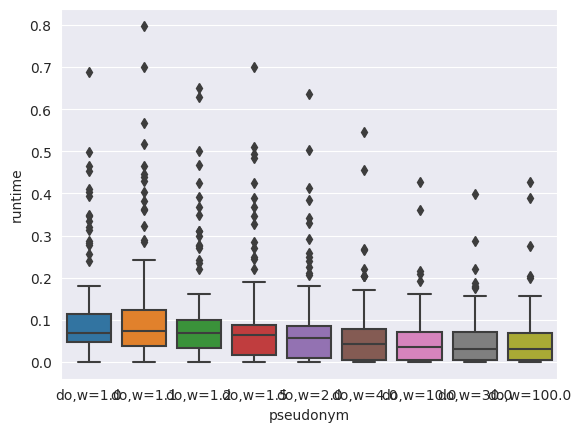

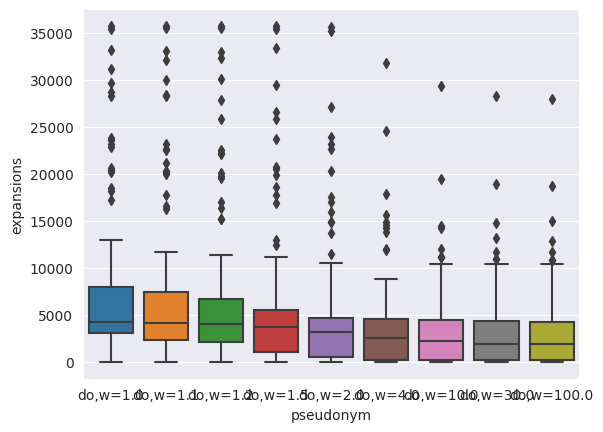

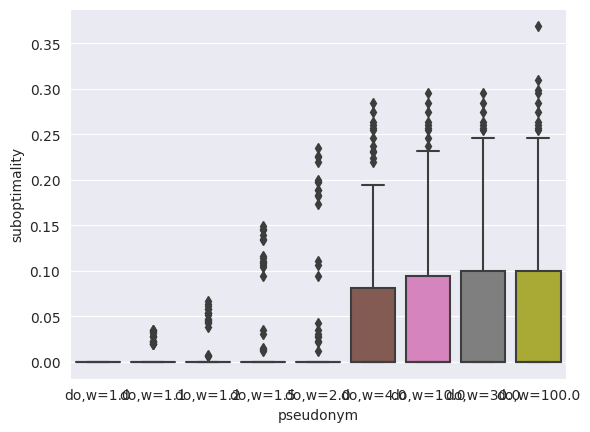

do,w=1.0 mean runtime: 112.8 ms
do,w=1.1 mean runtime: 125.8 ms
do,w=1.2 mean runtime: 108.5 ms
do,w=1.5 mean runtime: 99.0 ms
do,w=2.0 mean runtime: 83.0 ms
do,w=4.0 mean runtime: 63.3 ms
do,w=10.0 mean runtime: 53.3 ms
do,w=30.0 mean runtime: 50.5 ms
do,w=100.0 mean runtime: 52.5 ms
do,w=1.0 mean suboptimality: 0.0 %
do,w=1.1 mean suboptimality: 0.4 %
do,w=1.2 mean suboptimality: 0.8 %
do,w=1.5 mean suboptimality: 1.8 %
do,w=2.0 mean suboptimality: 3.0 %
do,w=4.0 mean suboptimality: 4.9 %
do,w=10.0 mean suboptimality: 5.3 %
do,w=30.0 mean suboptimality: 5.5 %
do,w=100.0 mean suboptimality: 6.1 %


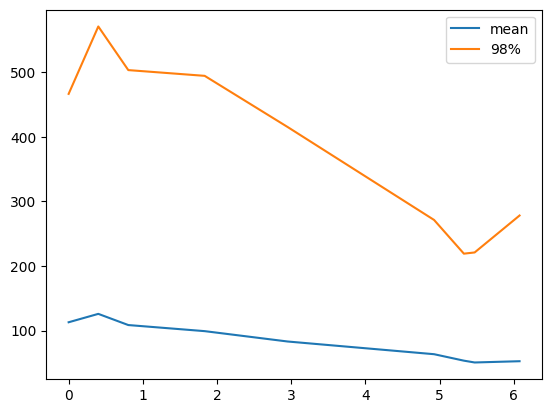

In [27]:
show_united_stats(["double","double","double","double","double","double","double","double","double"],
                  ["1.0","1.1","1.2","1.5","2.0","4.0","10.0","30.0","100.0"])

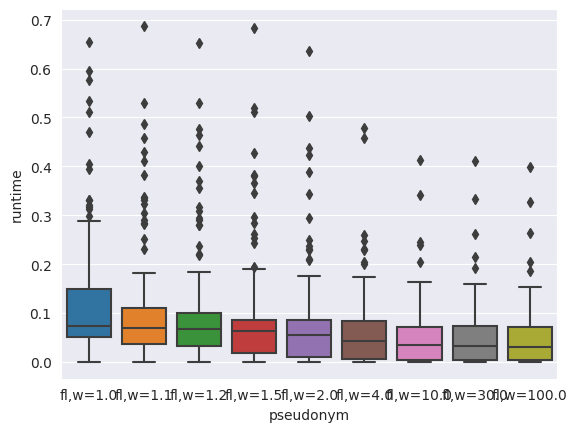

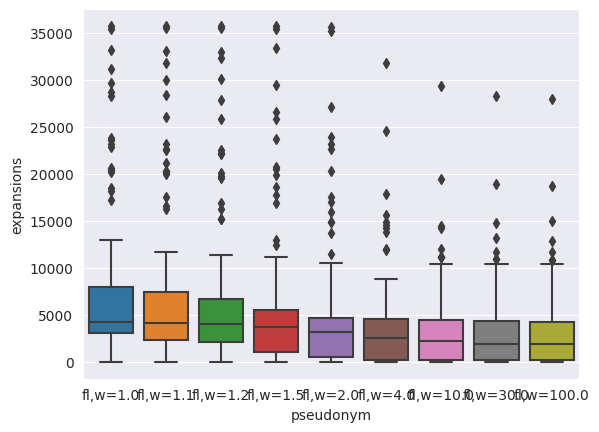

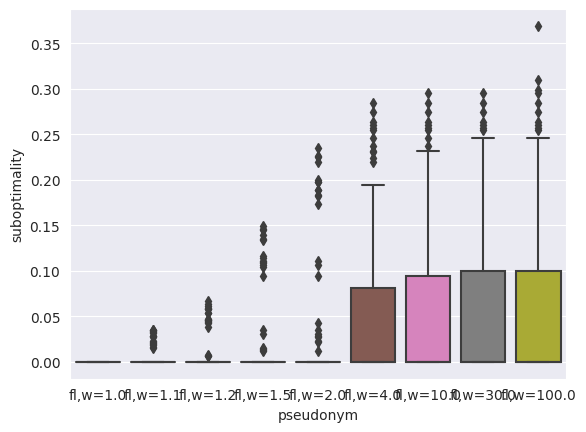

fl,w=1.0 mean runtime: 121.9 ms
fl,w=1.1 mean runtime: 111.6 ms
fl,w=1.2 mean runtime: 107.3 ms
fl,w=1.5 mean runtime: 96.4 ms
fl,w=2.0 mean runtime: 84.7 ms
fl,w=4.0 mean runtime: 63.1 ms
fl,w=10.0 mean runtime: 53.6 ms
fl,w=30.0 mean runtime: 52.3 ms
fl,w=100.0 mean runtime: 50.8 ms
fl,w=1.0 mean suboptimality: 0.0 %
fl,w=1.1 mean suboptimality: 0.4 %
fl,w=1.2 mean suboptimality: 0.8 %
fl,w=1.5 mean suboptimality: 1.8 %
fl,w=2.0 mean suboptimality: 3.0 %
fl,w=4.0 mean suboptimality: 4.9 %
fl,w=10.0 mean suboptimality: 5.3 %
fl,w=30.0 mean suboptimality: 5.5 %
fl,w=100.0 mean suboptimality: 6.1 %


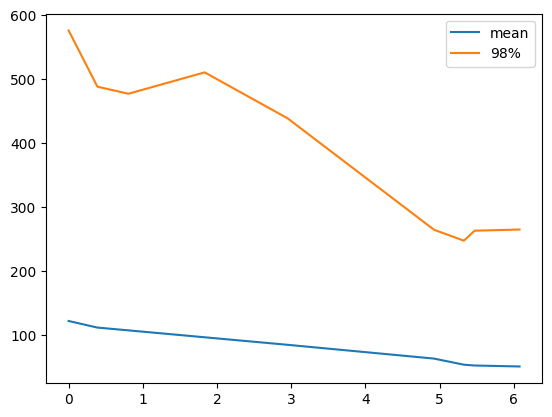

In [28]:
show_united_stats(["float","float","float","float","float","float","float","float","float"],
                  ["1.0","1.1","1.2","1.5","2.0","4.0","10.0","30.0","100.0"])

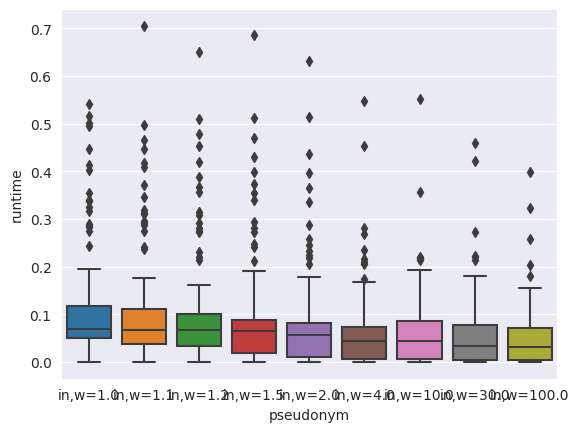

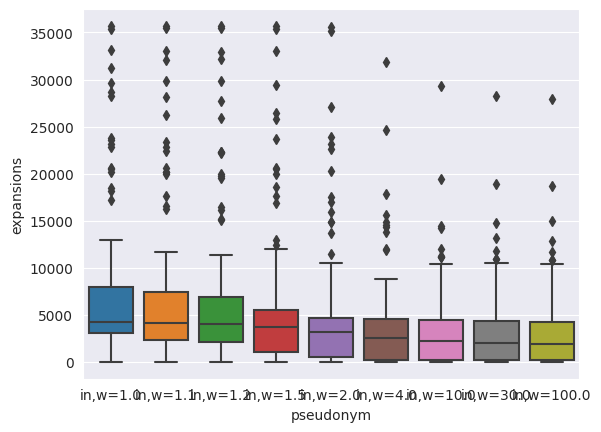

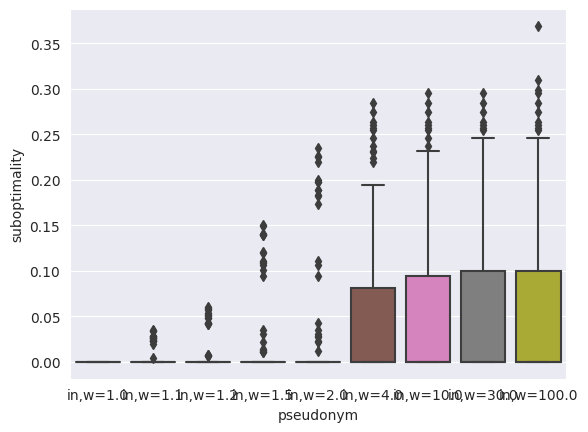

in,w=1.0 mean runtime: 113.6 ms
in,w=1.1 mean runtime: 109.1 ms
in,w=1.2 mean runtime: 105.1 ms
in,w=1.5 mean runtime: 96.0 ms
in,w=2.0 mean runtime: 83.3 ms
in,w=4.0 mean runtime: 63.6 ms
in,w=10.0 mean runtime: 61.5 ms
in,w=30.0 mean runtime: 58.2 ms
in,w=100.0 mean runtime: 51.2 ms
in,w=1.0 mean suboptimality: 0.0 %
in,w=1.1 mean suboptimality: 0.4 %
in,w=1.2 mean suboptimality: 0.8 %
in,w=1.5 mean suboptimality: 1.9 %
in,w=2.0 mean suboptimality: 3.0 %
in,w=4.0 mean suboptimality: 4.9 %
in,w=10.0 mean suboptimality: 5.3 %
in,w=30.0 mean suboptimality: 5.5 %
in,w=100.0 mean suboptimality: 6.1 %


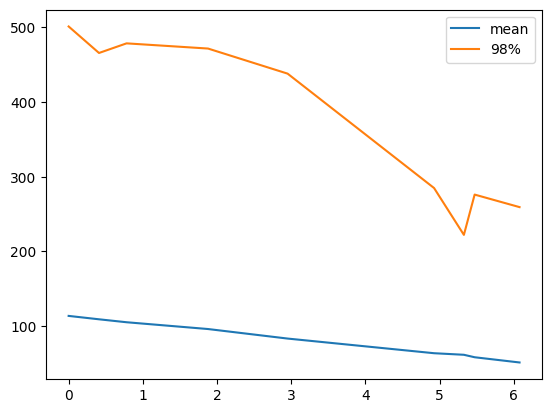

In [29]:
show_united_stats(["int","int","int","int","int","int","int","int","int"],
                  ["1.0","1.1","1.2","1.5","2.0","4.0","10.0","30.0","100.0"])